**Project title -: Customer Segmentation Analysis**

Step 1: Import Libraries & Load Dataset

In [33]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
# Load dataset
df = pd.read_csv("ifood_df.csv")

In [35]:
# Few rows display
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


Step 2: Data Exploration & Cleaning

In [36]:
# Check structure, missing values, and clean the data
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [37]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularP

In [38]:
# check duplicate values
df.duplicated().sum()

np.int64(184)

In [39]:
# view values of row and column
print("Delete duplicates value before:")
print(df.shape)

Delete duplicates value before:
(2205, 39)


In [40]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [41]:
print("Delete duplicates value after:")
df.shape

Delete duplicates value after:


(2021, 39)

Step 3: Create Total Spending Feature

In [42]:
# Combine all monetary columns to create a total spending feature
monetary_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[monetary_cols].sum(axis=1)
df[['TotalSpending'] + monetary_cols].head()

,TotalSpending,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntGoldProds
0,1445,635,88,546,88,88
1,25,11,1,6,1,6
2,665,426,49,127,21,42
3,43,11,4,20,3,5
4,376,173,43,118,27,15


Step 4: Feature Selection & Scaling

In [43]:
# Select relevant features and scale them
features = df[['TotalSpending', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 1.53874118,  1.41113054,  2.62835246, -0.55966728,  0.31506791],
       [-0.9587224 , -1.13163647, -0.5877325 , -1.17893231, -0.37592748],
       [ 0.16689499,  1.41113054, -0.23038972,  1.2981278 , -0.79052471],
       ...,
       [ 1.12366976, -0.76838404,  0.12695305,  2.22702535,  1.4552103 ],
       [ 0.33925515,  0.68462568,  0.84163859,  1.2981278 , -1.41242056],
       [-0.70369971, -0.40513161, -0.5877325 , -0.55966728, -0.30682794]])

In [44]:
# Convert to DataFrame for readability
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()

,TotalSpending,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency
0,1.538741,1.411131,2.628352,-0.559667,0.315068
1,-0.958722,-1.131636,-0.587732,-1.178932,-0.375927
2,0.166895,1.411131,-0.230390,1.298128,-0.790525
3,-0.927064,-0.768384,-0.945075,-0.559667,-0.790525
4,-0.341392,0.321373,0.126953,0.059598,1.558860


Step 5: Apply K-Means Clustering

In [45]:
# Apply K-Means algorithm to segment customers
# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

In [46]:
# Preview segment assignments
df[['TotalSpending', 'Segment']].head()

,TotalSpending,Segment
0,1445,1
1,25,0
2,665,2
3,43,0
4,376,3


Step 6: Visualize Segments\

Use scatter plots and bar charts to visualize segments

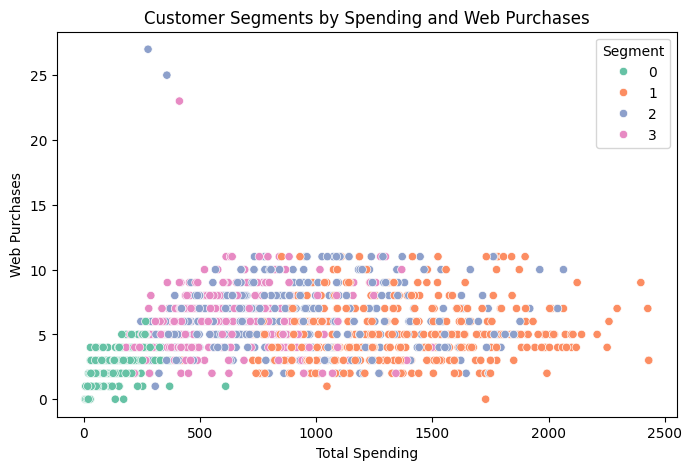

In [47]:
# Scatter plot: TotalSpending vs Web Purchases
plt.figure(figsize=(8,5))
sns.scatterplot(x='TotalSpending', y='NumWebPurchases', hue='Segment', data=df, palette='Set2')
plt.title('Customer Segments by Spending and Web Purchases')
plt.xlabel('Total Spending')
plt.ylabel('Web Purchases')
plt.show()

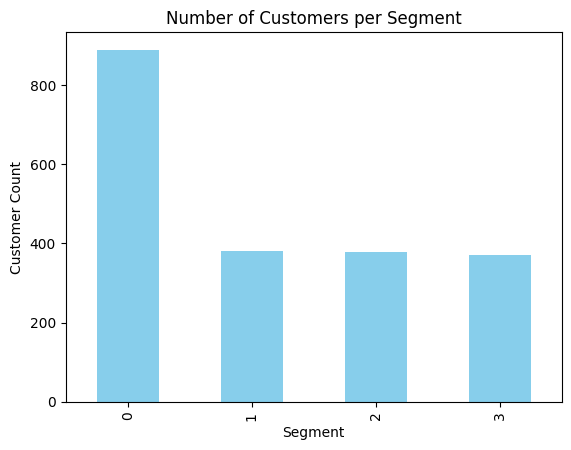

In [48]:
# Bar chart: Number of customers per segment
df['Segment'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Segment')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.show()

Step 7: Segment Profiling & Insights

Analyze average behavior of each segment

In [49]:
segment_profile = df.groupby('Segment')[['TotalSpending', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']].mean()
segment_profile

,TotalSpending,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency
Segment,,,,,
0,82.114736,1.968504,0.526434,3.147357,46.826772
1,1371.646597,5.259162,6.759162,8.890052,61.871728
2,906.640212,6.354497,3.735450,8.219577,18.925926
3,571.258065,5.795699,2.373656,6.548387,70.887097


Step 8: Final Summary

**Final Summary**

This project used K-Means clustering to segment customers based on their spending and purchase behavior.

We identified 4 distinct customer segments with different preferences:

- Segment 0: High spenders with frequent web purchases  
- Segment 1: Low spenders, prefer catalog  
- Segment 2: Balanced spenders across channels  
- Segment 3: Store-focused buyers

These insights can help ecommerce companies personalize marketing and improve customer satisfaction.